# Imports

In [1]:
import importlib
import SYT
import matplotlib.pyplot as plt
import time
import os



importlib.reload(SYT)

<module 'SYT' from 'c:\\Users\\said1210\\OneDrive - UW\\UW 23-24\\Summer 2024\\MATH 480\\Assignment 1\\Math-480\\6_20_2024_SYT\\SYT.py'>

## SYT Helper Functions.
Implement the functions `is_valid_SYT` and `reshape_perm` then run this cell to test your helper functions. 

In [4]:
print(SYT.is_valid_SYT(((1, 2, 3), (4, 5, 6), (7, 8, 9)))) # True
print(SYT.is_valid_SYT(((1, 2, 3), (5, 4), (6,)))) # False

print(SYT.reshape_perm((1, 2, 3, 4, 5, 6), (3, 2, 1))) # ((1, 2, 3), (4, 5), (6,))
print(SYT.reshape_perm((1, 2, 3, 4, 5, 6), (3, 3))) # ((1, 2, 3), (4, 5, 6))

True
False
((1, 2, 3), (4, 5), (6,))
((1, 2, 3), (4, 5, 6))


# Generate all SYTs
Implement `SYTs` and generate all valid SYTs for the following shapes:
- (4,3,2,1)
- (2,2)
- (3,3)
- (4,4)
- (5,5)

Save your SYTs in the `data` subfolder. For example, the SYTs of shape (4,3,2,1) are saved in `data/SYTs_4_3_2_1.txt`.

What do you notice about SYTs of shape (n,n)? Write your observation in this cell here:


In [5]:
path = "C:/Users/said1210/OneDrive - UW/UW 23-24/Summer 2024/MATH 480/Assignment 1/Math-480/6_20_2024_SYT/data/SYTs_4_3_2_1.txt"
# Generate SYTs
shapes = [(4,3,2,1), (2,2), (3,3), (4,4), (5,5)]

with open(path, 'w') as f:
    for shape in shapes:
        result = SYT.SYTs(shape)
        f.write(f"Shape {shape}: \n")
        for syt in result:
            f.write(f"{syt}\n")
        f.write("\n")

# We can see that the (n,n) have less amount of combinations to choose from, 
# making its computation a bit quicker than the slow (4,3, 2, 1) calculation

# Generating Random SYTs
Implement `random_SYT` and `random_SYT_2` and compare the efficacy on the shape (2,2,2).

Print out how long it takes to generate 10000 samples using each function and compare the distributions to the uniform distribution.

Plot the distributions using matplotlib and save them in the `figures` subfolder.

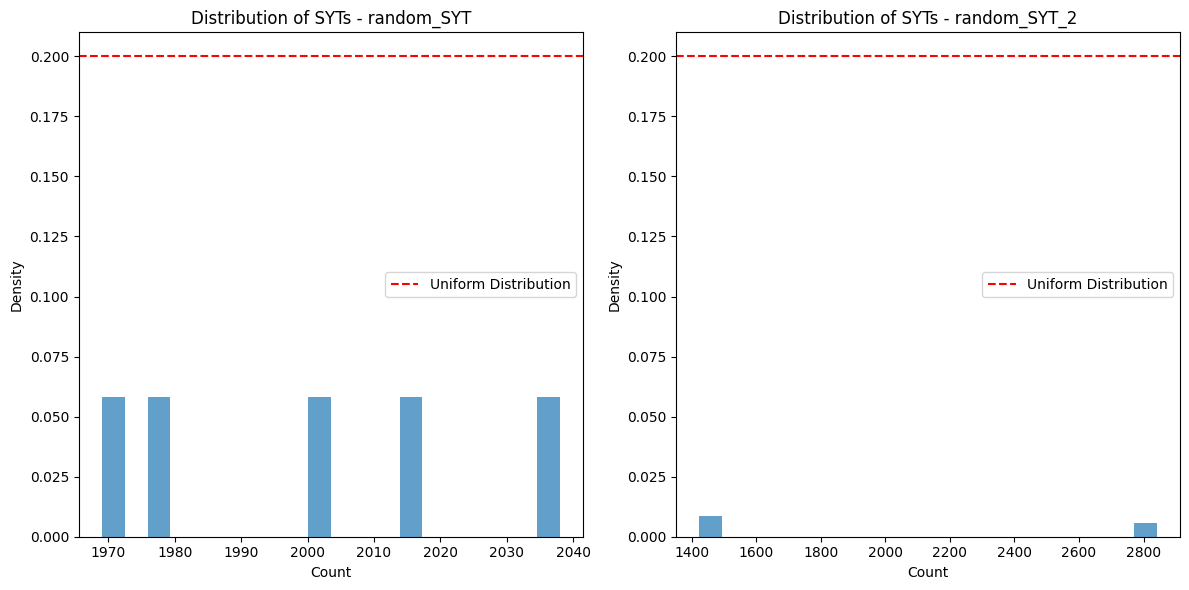

Time taken for random_SYT(): 4.8302 seconds
Time taken for random_SYT_2(): 37.0397 seconds


In [2]:
shape = (2,2,2)

distribution = {syt: 0 for syt in SYT.SYTs(shape)}
start_time = time.time()
for i in range(10000):
  # Test random_SYT()
  syt = SYT.random_SYT(shape)
  distribution[syt] += 1

time_random_SYT = time.time() - start_time

   

distribution2 = {syt: 0 for syt in SYT.SYTs(shape)}
start_time = time.time()
for i in range(10000):
  # Test random_SYT_2()
  syt = SYT.random_SYT_2(shape)
  distribution2[syt] += 1

time_random_SYT2 = time.time() - start_time


# Assuming uniform distribution for comparison
expected_count = 10000 / len(distribution)

# Plotting distributions
plt.figure(figsize=(12, 6))

# Distribution Random SYT 1
plt.subplot(1, 2, 1)
plt.hist(list(distribution.values()), bins=20, density=True, alpha=0.7)
plt.axhline(y=expected_count / 10000 , color='r', linestyle='--', label='Uniform Distribution')
plt.title('Distribution of SYTs - random_SYT')
plt.xlabel('Count')
plt.ylabel('Density')
plt.legend()

# Distribution Random SYT 2
plt.subplot(1, 2, 2)
plt.hist(list(distribution2.values()), bins=20, density=True, alpha=0.7)
plt.axhline(y=expected_count / 10000, color='r', linestyle='--', label='Uniform Distribution')
plt.title('Distribution of SYTs - random_SYT_2')
plt.xlabel('Count')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()

# Save figures in the 'figures' subfolder
figures_folder = 'C:/Users/said1210/OneDrive - UW/UW 23-24/Summer 2024/MATH 480/Assignment 1/Math-480/6_20_2024_SYT/figures'
if not os.path.exists(figures_folder):
    os.makedirs(figures_folder)

plt.savefig(os.path.join(figures_folder, 'SYT_distributions.png'))
plt.show()

# Print time taken for each function
print(f"Time taken for random_SYT(): {time_random_SYT:.4f} seconds")
print(f"Time taken for random_SYT_2(): {time_random_SYT2:.4f} seconds")